# 囚人のジレンマゲーム

・移動しないエージェントのシミュレーション<br>


Axelrod
https://axelrod.readthedocs.io/en/stable/

In [1]:
import axelrod as axl

協調戦略(Cooperator戦略)と裏切り戦略(Defector戦略)の対戦

In [3]:
match = axl.Match([axl.Cooperator(),axl.Defector()], 5)
print(match.play())
print(match.scores()) 
print(match.final_score())
print(match.sparklines()) 

[(C, D), (C, D), (C, D), (C, D), (C, D)]
[(0, 5), (0, 5), (0, 5), (0, 5), (0, 5)]
(0, 25)
█████
     


しっぺ返し戦略(TitForTat戦略)と一切り戦略(Defector戦略)の対戦

In [4]:
match = axl.Match([axl.TitForTat(),axl.Defector()], 5)
print(match.play())
print(match.scores()) 
print(match.final_score())
print(match.sparklines()) 

[(C, D), (D, D), (D, D), (D, D), (D, D)]
[(0, 5), (1, 1), (1, 1), (1, 1), (1, 1)]
(4, 9)
█    
     


協調と裏切りを繰り返す戦略(Alternator戦略)としっぺ返し戦略(TitForTat戦略)の対戦

In [5]:
match = axl.Match([axl.Alternator(),axl.TitForTat()], 5)
print(match.play())
print(match.scores()) 
print(match.final_score())
print(match.sparklines()) 

[(C, C), (D, C), (C, D), (D, C), (C, D)]
[(3, 3), (5, 0), (0, 5), (5, 0), (0, 5)]
(13, 13)
█ █ █
██ █ 


リーグ戦を行うための戦略の登録

In [6]:
strategy = [axl.Cooperator(),#0
            axl.Alternator(),#1
            axl.Defector(),#2
            axl.Random(),#3
            axl.TitForTat(),#4
            axl.Grudger(),#5
            axl.CyclerDDC(),#6
            axl.CyclerCCD(),#7
            axl.GoByMajority(),#8
            axl.SuspiciousTitForTat(),#8
            axl.Prober(),#10
            axl.OriginalGradual(),#11
            axl.WinStayLoseShift(),#12
            ]

リーグ戦（日本以外ではこれをトーナメントと呼ぶ）の設定と実行

In [7]:
tournament = axl.Tournament(players = strategy, turns=200, repetitions=10)
result = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 162.25it/s]


結果の表示

<ipython-input-8-c0b80d1c193e>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()
<ipython-input-8-c0b80d1c193e>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()
<ipython-input-8-c0b80d1c193e>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


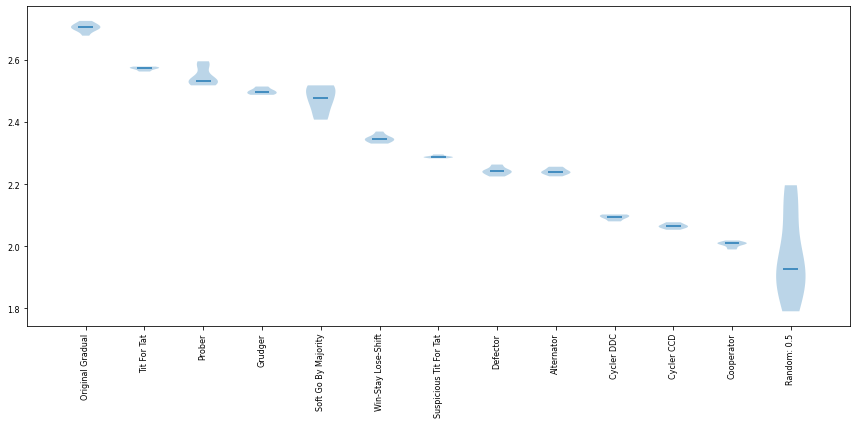

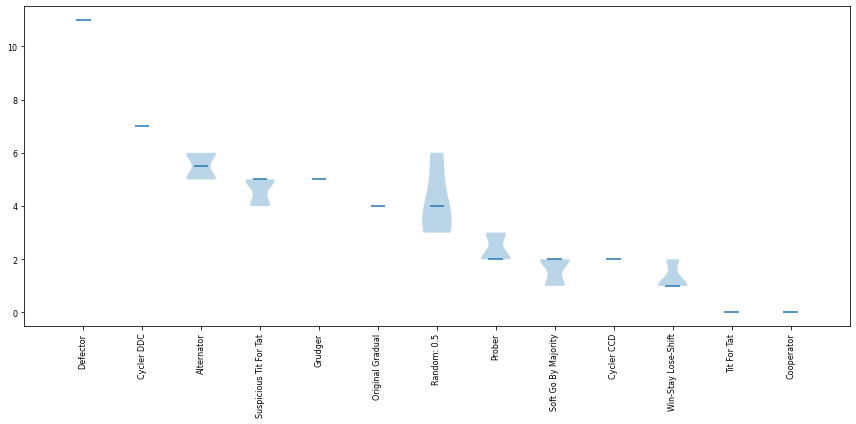

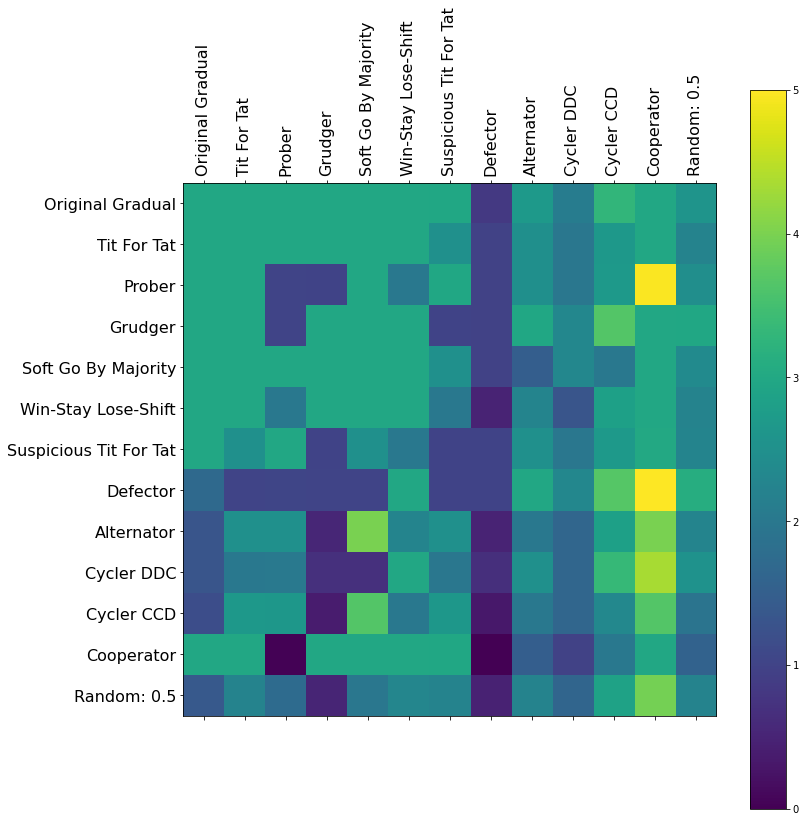

In [8]:
%matplotlib inline

plot = axl.Plot(result)
p = plot.boxplot()
p.show()
p = plot.winplot()
p.show()
p = plot.payoff()
p.show()

自作戦略の追加

In [9]:
from axelrod.strategy_transformers import *
class MyStrategy(Player):
    name = "MyStrategy"
    classifier = {
        "memory_depth": 1,
        "stochastic": False,
        "long_run_time": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def strategy(self, opponent: Player) -> Action:
        if len(self.history) == 0:
            return D
        if self.history[-1] == C:
            return D
        return C


自作戦略(MyStrategy戦略)と協調戦略(Cooperator戦略)の対戦

In [12]:
match = axl.Match([MyStrategy(), axl.Cooperator()], 5)
print(match.play())
print(match.scores()) 
print(match.final_score())
print(match.sparklines()) 

[(D, C), (C, C), (D, C), (C, C), (D, C)]
[(5, 0), (3, 3), (5, 0), (3, 3), (5, 0)]
(21, 6)
 █ █ 
█████
